Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings("ignore")


# LAB1

2. Load the customer_value_analysis.csv into the variable customer_df
3. First look at its main features (head, shape, info)

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:
for col in customer_df.columns:
    customer_df.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)


In [6]:
customer_df.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


5. Change the type of effective_to_date column to DateTime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

6. Check NaN values per column

In [9]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [10]:
def Categ_Numerical(df):
    num_cols_df = df.select_dtypes(include=["float64", "int64"])
    cat_cols_df = df.select_dtypes(exclude=["float64", "int64"])
    return num_cols_df, cat_cols_df

In [11]:
Numerical_df = Categ_Numerical(customer_df)[0]
Numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
Categorical_df = Categ_Numerical(customer_df)[1]
Categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


8. Drop any ID column.

In [13]:
customer_df = customer_df.drop([col for col in customer_df.columns if 'ID' in col or 'id' in col], axis=1)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [14]:
Corr_Matrix = Numerical_df.corr()
Corr_Matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


from the correlation matrix above, pair of numerical variables with the highest correlation between them are monthly_premium_auto and total_claim_amount of 0.632 which is higher than any other combination of variables we have. This implies that as the monthly premius increases, then also the total claim amount increases and vice versa.

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [15]:
def NumCont_NumDiscrete(df, unique_threshold=36):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    continuous_cols = [col for col in num_cols if len(df[col].unique()) > unique_threshold]
    discrete_cols = [col for col in num_cols if len(df[col].unique()) <= unique_threshold]

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [16]:
continuous_df, discrete_df = NumCont_NumDiscrete(customer_df,unique_threshold=36)

In [17]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [18]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [19]:
def barplot_discrete_df(discrete_df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(discrete_df.columns):
        plt.subplot(2, 2, i + 1)
        sns.countplot(x=col, data=discrete_df)
    plt.tight_layout()
    plt.show()


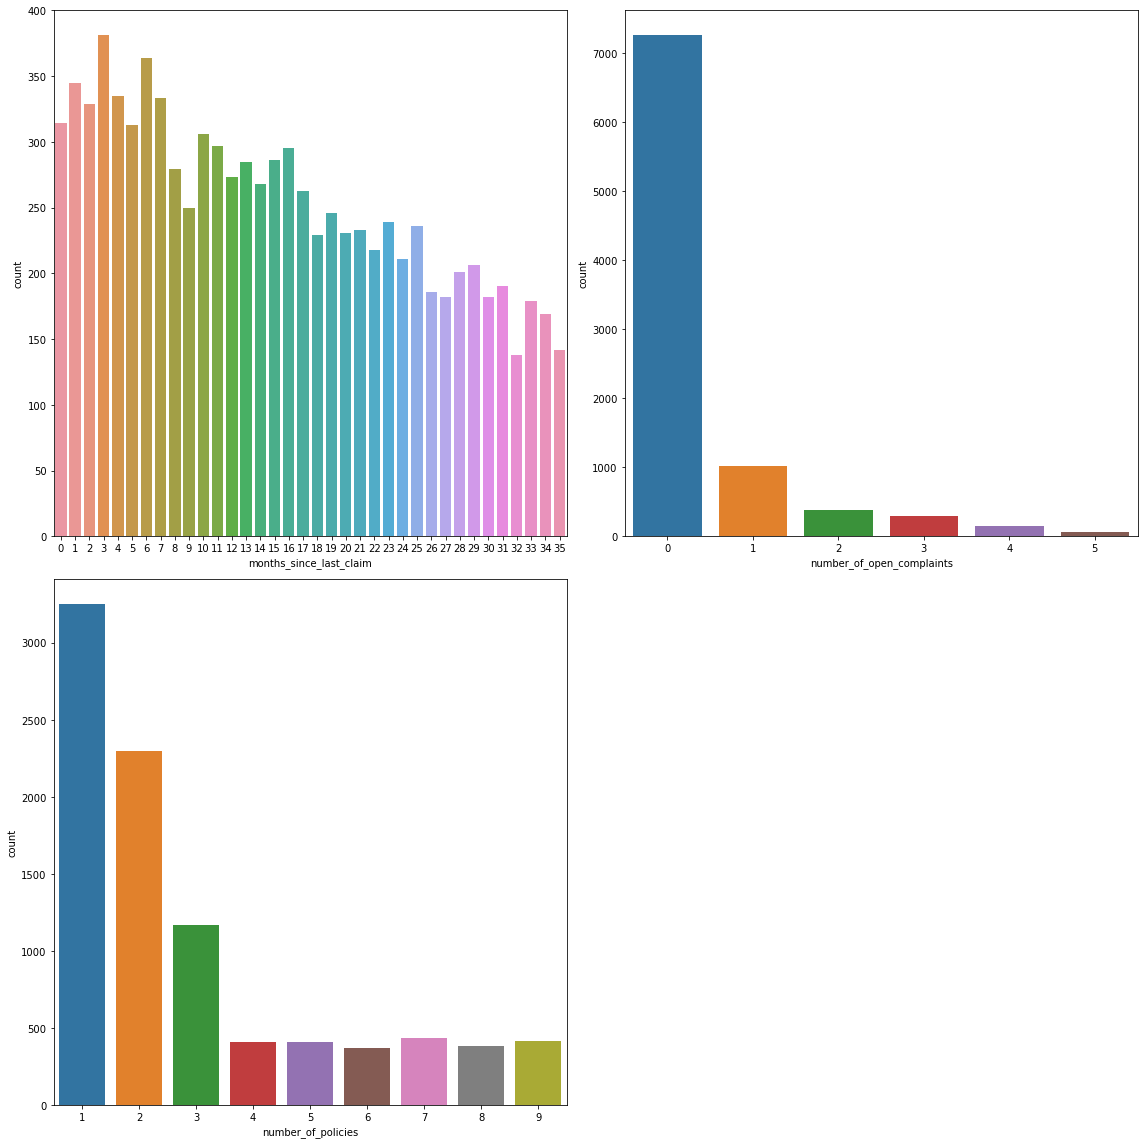

In [20]:
barplot_discrete_df(discrete_df)

12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [21]:
def histogram_continuous_df(continuous_df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_df.columns):
        plt.subplot(3, 3, i + 1)
        sns.histplot(x=col, data=continuous_df)
    plt.tight_layout()
    plt.show()

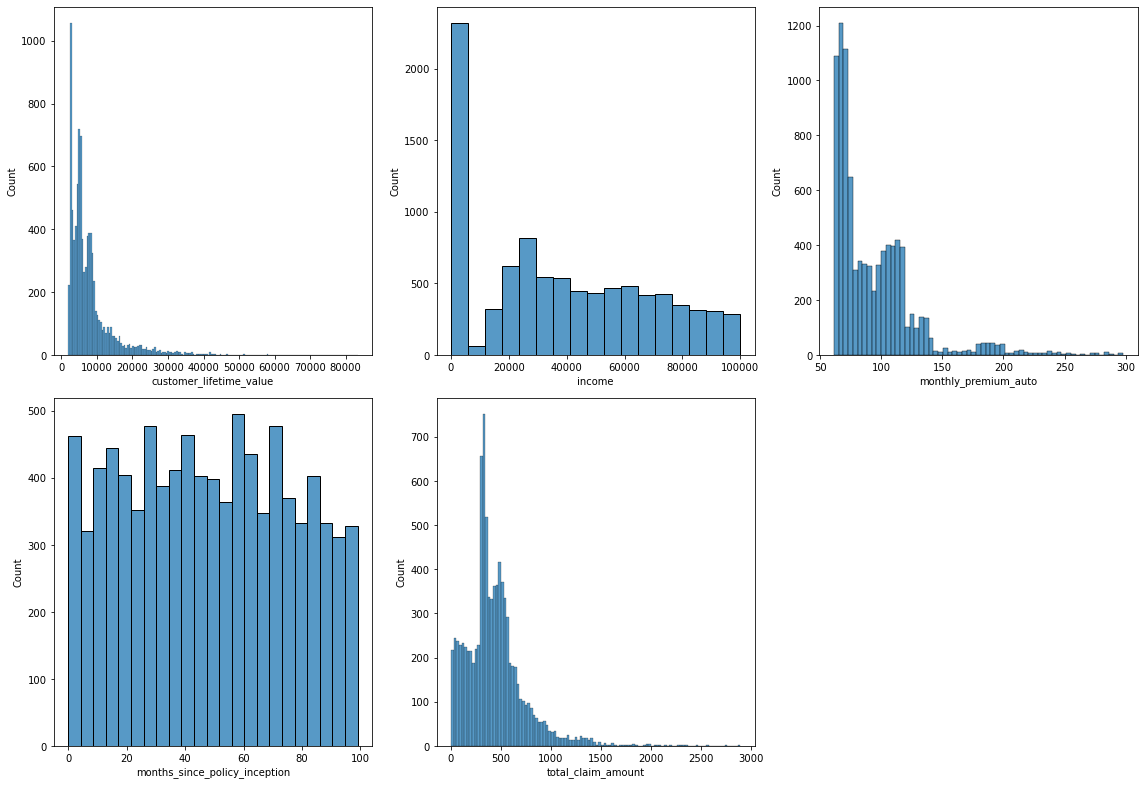

In [22]:
histogram_continuous_df(continuous_df)

13. According to the previous histogram plots, do you think that you will have to apply any transformation?

14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [23]:
def boxplot_Outlier_Check(continuous_df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_df.columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=col, data=continuous_df)
    plt.tight_layout()
    plt.show()

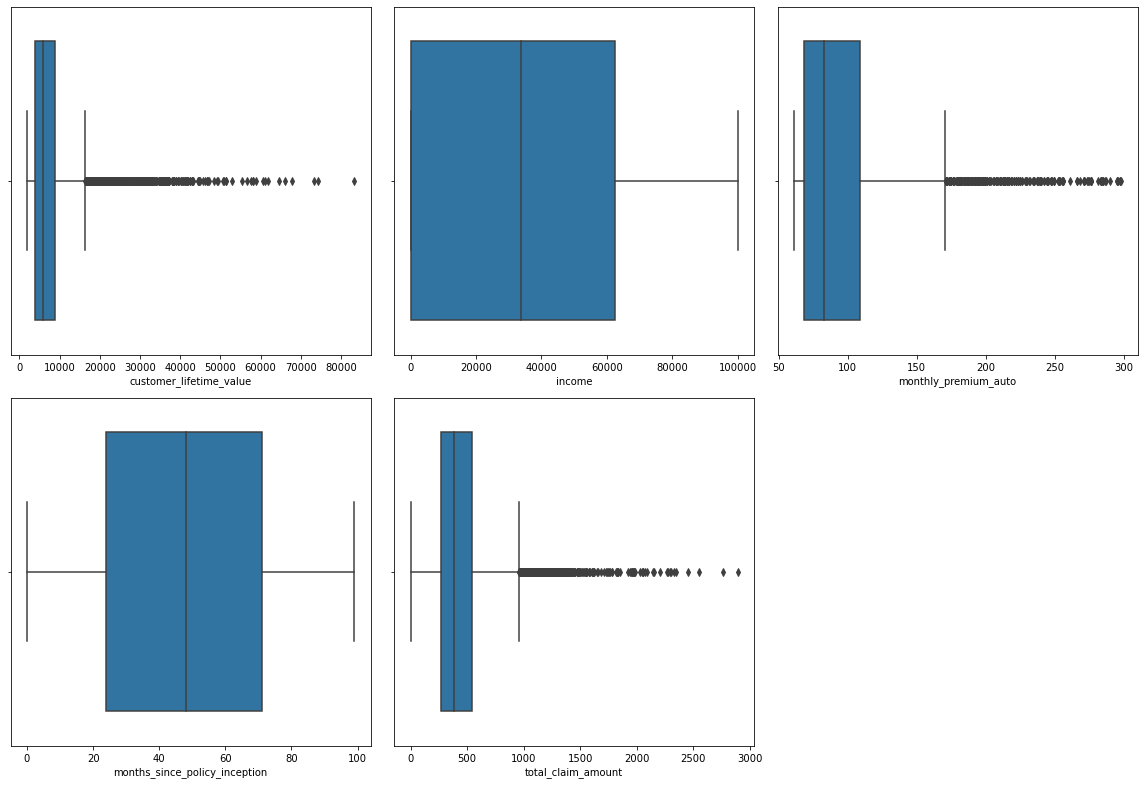

In [24]:
boxplot_Outlier_Check(continuous_df)

The outliers in the data are represented as individual points outside the box in the box plot.

# LAB2: Lab Cleaning Categorical Data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [25]:
def countplot_categorical_columns(df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(df.select_dtypes(include='object').columns):
        plt.subplot(4, 4, i + 1)
        ax = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        if df[col].nunique() >= 6:
            ax.set_ylabel("Frequency")
            ax.set_xlabel("")
        else:
            ax.set_xlabel("Frequency")
            ax.set_ylabel("")
    plt.tight_layout()
    plt.show()

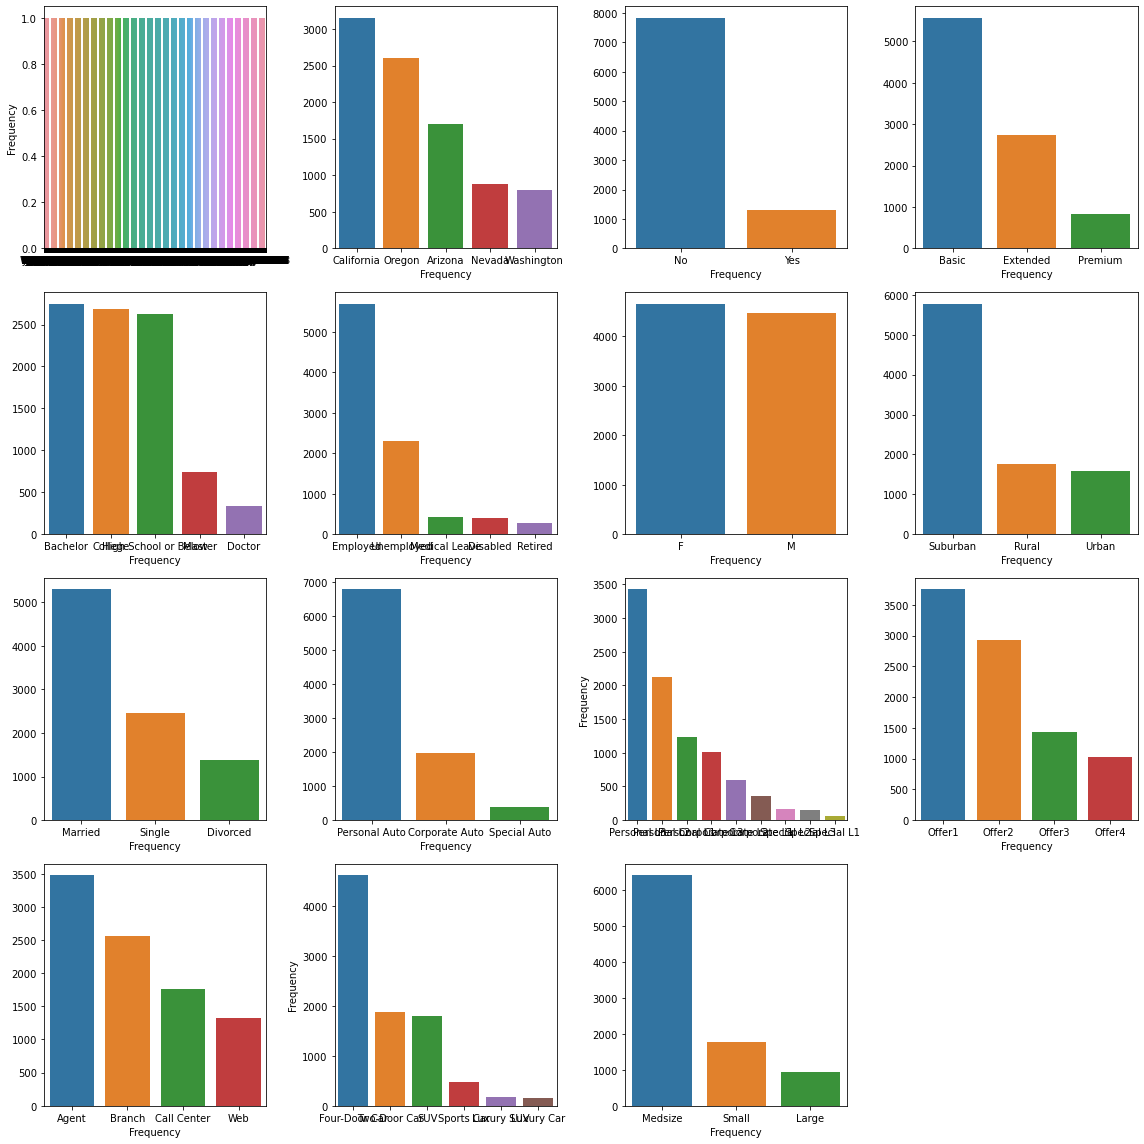

In [26]:
countplot_categorical_columns(customer_df)

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [27]:
customer_df[['policy_type','policy']].head(2)

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3


In [28]:
customer_df['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [29]:
customer_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [30]:
# drop policy_type
customer_df.drop(columns='policy_type',inplace=True)

In [31]:
def map_policy(policy):
    if policy in ['Special L1', 'Corporate L1','Personal L1']:
        return 'L1'
    elif policy in ['Corporate L2', 'Special L2', 'Personal L2']:
        return 'L2'
    else:
        return 'L3'

customer_df['policy'] = customer_df['policy'].apply(map_policy)

In [32]:
# drop policy_type
Categorical_df.drop(columns='policy_type',inplace=True)

In [33]:
Categorical_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [34]:
Categorical_df['policy'] = Categorical_df['policy'].apply(map_policy)
Categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [35]:
# final_df['education'] = final_df['education'].where(~final_df['education'].isin(['Master', 'Doctor']), 'Graduate')

In [36]:
customer_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [37]:
customer_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

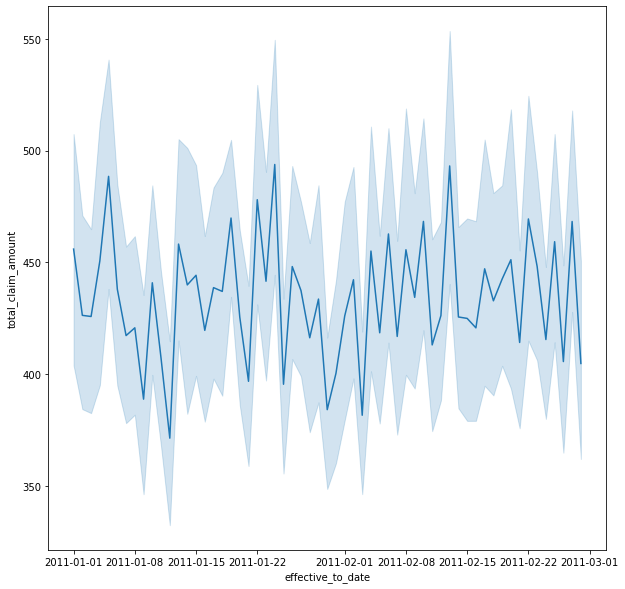

In [38]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.show()

4.     To continue the analysis define an empty pandas DataFrame, and add the following new columns:

    day with the day number of effective_to_date
    day_name with the day NAME of effective_to_date
    week with the week of effective_to_date
    month with the month NAME of effective_to_date
    total_claim_amount with total_claim_amount


In [39]:
df_new = pd.DataFrame()
df_new['day'] = customer_df['effective_to_date'].dt.day
df_new['day_name'] = customer_df['effective_to_date'].dt.day_name()
df_new['week'] = customer_df['effective_to_date'].dt.week
df_new['month'] = customer_df['effective_to_date'].dt.month_name()
df_new['total_claim_amount'] = customer_df['total_claim_amount']

In [40]:
df_new

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [41]:
# Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compute the total of the total_claim_amount column aggregated by day_name
aggregated_day_name = df_new.groupby('day_name').agg({'total_claim_amount': 'sum'})['total_claim_amount'].round(2)

# Reorder the index of the aggregated series
aggregated_day_name = pd.DataFrame(aggregated_day_name.reindex(index=list_of_correct_days))
aggregated_day_name

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

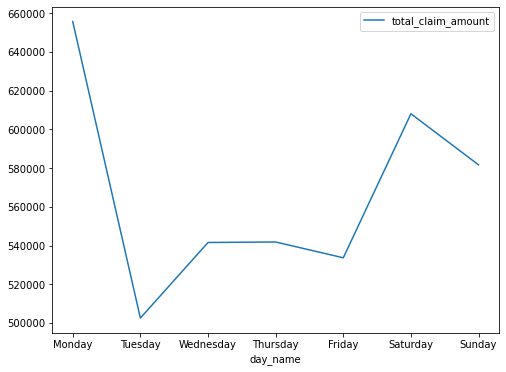

In [42]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=aggregated_day_name)
plt.show()

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [43]:
# Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compute the total of the total_claim_amount column aggregated by day_name
aggregated_day_name = df_new.groupby('day_name').agg({'total_claim_amount': 'count'})['total_claim_amount'].round(2)

# Reorder the index of the aggregated series
aggregated_day_name = pd.DataFrame(aggregated_day_name.reindex(index=list_of_correct_days)).rename(columns={'total_claim_amount':'total number of claims'})
aggregated_day_name

,total number of claims
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [44]:
# Define the list of correct days in the desired order
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Compute the total of the total_claim_amount column aggregated by day_name
aggregated_median_day_name = df_new.groupby('day_name').agg({'total_claim_amount': 'median'})['total_claim_amount'].round(2)

# Reorder the index of the aggregated series
aggregated_median_day_name = pd.DataFrame(aggregated_median_day_name.reindex(index=list_of_correct_days)).rename(columns={'total_claim_amount':'median'})
median_df = aggregated_median_day_name.sort_values(by='median', ascending=False)
median_df

,median
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


9. Plot the median "target" by day of the week name using a seaborn barplot

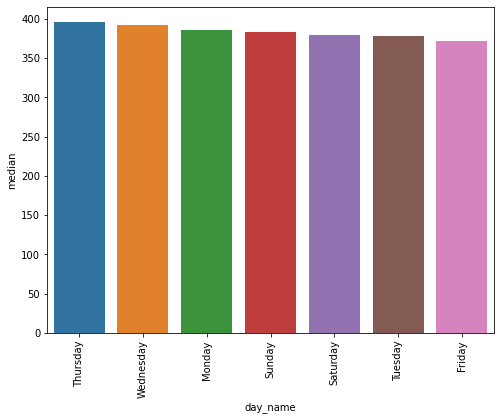

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(x=median_df.index, y=median_df['median'])
plt.xticks(rotation=90)
plt.show()

10. What can you conclude from this analysis?

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [46]:
df_new['month'].unique()

array(['February', 'January'], dtype=object)

In [47]:
# Define the list of correct months in the desired order
list_of_correct_months = ['January', 'February']

# Compute the total of the "target" column aggregated by month
aggregated_month = df_new.groupby('month').agg({'total_claim_amount': 'sum'})['total_claim_amount']

# Reorder the index of the aggregated series
aggregated_month = pd.DataFrame(aggregated_month.reindex(index=list_of_correct_months))
aggregated_month

,total_claim_amount
month,
January,2.117143e+06
February,1.847824e+06


12. Can you do a monthly analysis given the output of the previous series? Why?

No. because we can not do a monthly analysis for only two months available in the year

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [48]:
def remove_outliers_df(df, thr=3):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - thr * std
        upper_bound = mean + thr * std
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df

In [49]:
Continuous_clean = remove_outliers_df(continuous_df, thr=3)
Continuous_clean.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [50]:
Continuous_clean.shape, discrete_df.shape, Categorical_df.shape, df_new.shape

((8575, 5), (9134, 3), (9134, 15), (9134, 5))

In [51]:
# Concatenate the individual DataFrames
final_df = pd.concat([Continuous_clean, discrete_df, Categorical_df, df_new.drop(columns='total_claim_amount')], 
                     axis=1)

# Remove rows with NaN values
final_df.dropna(inplace=True)

# Reset the index of the final DataFrame
final_df.reset_index(drop=True, inplace=True)

In [52]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,BU79786,Washington,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,QZ44356,Arizona,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,AI49188,Nevada,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,WW63253,California,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,HB64268,Washington,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [53]:
cols = list(final_df.columns)
cols.remove('total_claim_amount')
cols.append('total_claim_amount')
final_df = final_df[cols]
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,No,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


17. Turn the response column values into (Yes=1/No=0).

In [54]:
final_df['response'] = final_df['response'].map({'Yes': 1, 'No': 0})

In [55]:
final_df['response'].unique()

array([0, 1], dtype=int64)

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [56]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'customer', 'state',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

In [57]:
final_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [58]:
final_df['education'] = final_df['education'].where(~final_df['education'].isin(['Master', 'Doctor']), 'Graduate')

In [59]:
final_df['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [60]:
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [61]:
final_df['employmentstatus'] = final_df['employmentstatus'].where(~final_df['employmentstatus'].isin(["Medical Leave", "Disabled", "Retired"]), 'Inactive')

In [62]:
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

20. Deal with column Gender turning the values into (1/0).

In [63]:
final_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [64]:
final_df['gender'] = final_df['gender'].map({'F': 0, 'M': 1})

In [65]:
final_df['gender'].unique()

array([0, 1], dtype=int64)

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [66]:
final_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV',
       'Luxury Car'], dtype=object)

In [67]:
final_df['vehicle_class'] = final_df['vehicle_class'].where(~final_df['vehicle_class'].isin(["Sports Car", "Luxury SUV", 
                                                                                             "Luxury Car"]), 'Luxury')

In [68]:
final_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic"

In [69]:
final_df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [70]:
coverage_mapping = {"Premium": 3, "Extended": 2, "Basic": 1}
final_df["coverage"] = final_df["coverage"].map(coverage_mapping)

In [71]:
final_df['coverage'].unique()

array([1, 2, 3], dtype=int64)

23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [72]:
final_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [73]:
employment_mapping = {"Employed": 3, "Inactive": 2, "Unemployed": 1}
final_df["employmentstatus"] = final_df["employmentstatus"].map(employment_mapping)

In [74]:
final_df['employmentstatus'].unique()

array([3, 1, 2], dtype=int64)

24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [75]:
final_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [76]:
location_mapping = {"Urban": 3, "Suburban": 2, "Rural": 1}
final_df["location_code"] = final_df["location_code"].map(location_mapping)

In [77]:
final_df['location_code'].unique()

array([2, 1, 3], dtype=int64)

25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [78]:
final_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [79]:
vehicle_mapping = {"Large": 3, "Medsize": 2, "Small": 1}
final_df["vehicle_size"] = final_df["vehicle_size"].map(vehicle_mapping)

In [80]:
final_df['vehicle_size'].unique()

array([2, 1, 3], dtype=int64)

26. Get a dataframe with the categorical nominal columns

In [81]:
cat_nominal_df = final_df.loc[:, final_df.dtypes == object]

In [82]:
cat_nominal_df

,customer,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,BU79786,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,QZ44356,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday,January
2,AI49188,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
3,WW63253,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday,January
4,HB64268,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February
...,...,...,...,...,...,...,...,...,...,...
8570,LA72316,California,Bachelor,Married,L1,Offer2,Web,Four-Door Car,Thursday,February
8571,PK87824,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday,February
8572,TD14365,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday,February
8573,UP19263,California,College,Married,L2,Offer3,Branch,Four-Door Car,Thursday,February


27.     Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [83]:
levels = {}
for col in cat_nominal_df.columns:
    levels[col]=(cat_nominal_df[col].unique().tolist())

In [84]:
levels

{'customer': ['BU79786',
  'QZ44356',
  'AI49188',
  'WW63253',
  'HB64268',
  'OC83172',
  'XZ87318',
  'CF85061',
  'DY87989',
  'BQ94931',
  'SX51350',
  'VQ65197',
  'DP39365',
  'SJ95423',
  'IL66569',
  'BW63560',
  'FV94802',
  'OE15005',
  'WC83389',
  'FL50705',
  'ZK25313',
  'SV62436',
  'YH23384',
  'TZ98966',
  'HM55802',
  'FS42516',
  'US89481',
  'HO30839',
  'GE62437',
  'EJ77678',
  'SV85652',
  'PF41800',
  'AO98601',
  'SK67821',
  'YV55495',
  'KY38074',
  'DM79012',
  'CM61827',
  'WC35801',
  'QG25316',
  'MB98372',
  'IL19217',
  'SR38658',
  'DH41343',
  'HG65722',
  'BU27331',
  'XM45289',
  'KP34198',
  'SH90947',
  'RB69909',
  'XR95069',
  'FR46645',
  'SY17488',
  'AP67935',
  'FS37417',
  'ML29312',
  'UB61619',
  'CD86811',
  'RU83859',
  'FG63582',
  'NN71951',
  'WB37082',
  'SM52139',
  'FL82372',
  'DP45816',
  'GW33762',
  'RZ33670',
  'PY70169',
  'MO91628',
  'HW87852',
  'HB20453',
  'BN87372',
  'YX23800',
  'DZ87709',
  'XW13033',
  'LN31673',


28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [85]:
encoder = OneHotEncoder(drop='first', categories='levels')
encoder

OneHotEncoder(categories='levels', drop='first')

# LAB3: Lab Comparing Regression Models

1. Define X and y

In [86]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,0,...,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,0,...,L3,Offer3,Agent,Four-Door Car,2,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,0,...,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,0,...,L2,Offer1,Call Center,SUV,2,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,0,...,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,5,February,138.130879


In [87]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'customer', 'state',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

In [88]:
X = final_df.drop(columns=['total_claim_amount','customer','effective_to_date'], axis=1)
y = final_df['total_claim_amount']

X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,...,Married,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,Single,L3,Offer3,Agent,Four-Door Car,2,31,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,...,Married,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,...,Married,L2,Offer1,Call Center,SUV,2,20,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,...,Single,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,5,February


2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [90]:
# Selecting the categorical columns
X_train_cat,X_train_num = X_train.select_dtypes(include=[np.object]),X_train.select_dtypes(exclude=[np.object])
X_test_cat, X_test_num= X_test.select_dtypes(include=[np.object]),X_test.select_dtypes(exclude=[np.object])
# X_train_num

4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [91]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

# encode the categorical variables in the training set
X_train_encoded = encoder.transform(X_train_cat).toarray()

# encode the categorical variables in the test set
X_test_encoded = encoder.transform(X_test_cat).toarray()

# convert the numpy arrays into pandas dataframes
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train_cat.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test_cat.index)

# set the column names using the encoder's get_feature_names_out() method
X_train_encoded_df.columns = encoder.get_feature_names(X_train_cat.columns)
X_test_encoded_df.columns = encoder.get_feature_names(X_test_cat.columns)


5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [92]:
power_transformer = PowerTransformer()
power_transformer.fit(X_train_num)

# transform the numerical variables in the training set
X_train_transformed = power_transformer.transform(X_train_num)

# transform the numerical variables in the test set
X_test_transformed = power_transformer.transform(X_test_num)

# convert the numpy arrays into pandas dataframes
X_train_num_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_num.index, columns=X_train_num.columns)
X_test_num_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_num.index, columns=X_test_num.columns)


6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [93]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_encoded_df], axis=1)

X_test_new = pd.concat([X_test_num_transformed_df, X_test_encoded_df], axis=1)

7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [94]:
scaler = MinMaxScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(data=X_train_new_scaled, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(data=X_test_new_scaled, columns=X_test_new.columns, index=X_test_new.index)


8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [95]:
model = LinearRegression()
model.fit(X_train_new_scaled_df, y_train)

# train predictions
train_predictions = model.predict(X_train_new_scaled_df)
# test predictions
test_predictions = model.predict(X_test_new_scaled_df)
# evaluating the performance of the model

9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

In [96]:
def model_evaluation(y_pred,y_test):
    MAE = mae(y_pred,y_test)
    MAPE = mape(y_test,y_pred)
    MSE = mse(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,y_pred)
    
    table_values = {'Error_metric':['MAE','MAPE','MSE','RMSE','R2'], 'Value':[MAE,MAPE,MSE,RMSE,R2]}
    df_metrics = pd.DataFrame(table_values).set_index('Error_metric')
    
    return df_metrics

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [97]:
train_evaluation_table = model_evaluation(train_predictions,y_train)
train_evaluation_table

,Value
Error_metric,
MAE,118.498022
MAPE,1.568610
MSE,22980.747644
RMSE,151.594022
R2,0.533807


In [98]:
test_evaluation_table = model_evaluation(test_predictions,y_test)
test_evaluation_table

,Value
Error_metric,
MAE,119.213162
MAPE,1.675672
MSE,23652.858410
RMSE,153.794858
R2,0.518068


11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models. 

In [99]:
def train_several_models(list_models, X_train, y_train):
    trained_models = []
    for model in list_models:
        Mymodel = model().fit(X_train, y_train)
        trained_models.append(Mymodel)
    return trained_models

12.     Use the function to train the following models (with default settings):

*LinearRegressor

*KNeighborsRegressor

*MLPRegressor

In [100]:
list_models = [LinearRegression, KNeighborsRegressor, MLPRegressor]
trained_models = train_several_models(list_models, X_train_new_scaled_df, y_train)
trained_models

[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

13. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [101]:
# Evaluate the models on the training set
train_metrics = {}
for model in trained_models:
    y_train_pred = model.predict(X_train_new_scaled_df)
    metrics = model_evaluation(y_train, y_train_pred)
    train_metrics[model] = metrics

# Evaluate the models on the test set
test_metrics = []
for model in trained_models:
    y_test_pred = model.predict(X_test_new_scaled_df)
    metrics = model_evaluation(y_test, y_test_pred)
    test_metrics.append(metrics)

# train_metrics

# train_metrics.keys()

# Print the error metrics for each model on the training set
for i, model_metrics in enumerate(train_metrics):
    print(f"Error metrics for model {i}:")
    print(model_metrics)
    print()

# Print the error metrics for each model on the test set
for i, model_metrics in enumerate(test_metrics):
    print(f"Error metrics for model {i}:")
    print(model_metrics)
    print()

Error metrics for model 0:
LinearRegression()

Error metrics for model 1:
KNeighborsRegressor()

Error metrics for model 2:
MLPRegressor()

Error metrics for model 0:
                     Value
Error_metric              
MAE             119.213162
MAPE              0.356087
MSE           23652.858410
RMSE            153.794858
R2                0.069253

Error metrics for model 1:
                     Value
Error_metric              
MAE             133.200570
MAPE              0.362734
MSE           32148.512972
RMSE            179.300064
R2               -0.699891

Error metrics for model 2:
                     Value
Error_metric              
MAE             109.451912
MAPE              0.329236
MSE           20686.260237
RMSE            143.827189
R2                0.201299



# LAB4: Random variable distributions

1. Get the numerical variables from our dataset.

In [113]:
Numerical_variables = customer_df.select_dtypes(include=['int64', 'float64'])
Numerical_variables

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

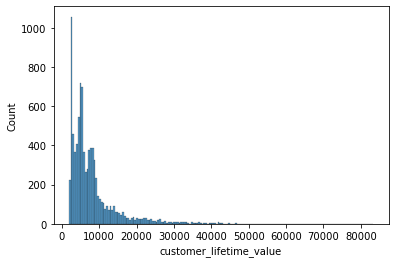

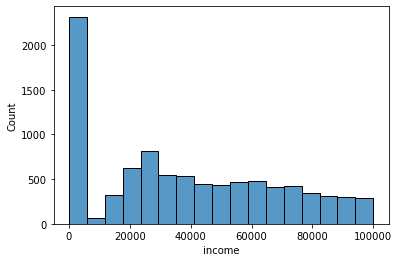

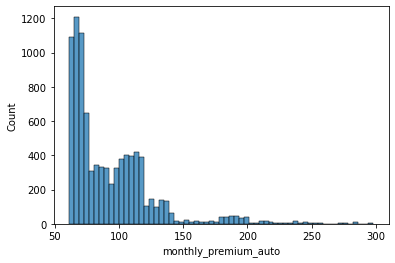

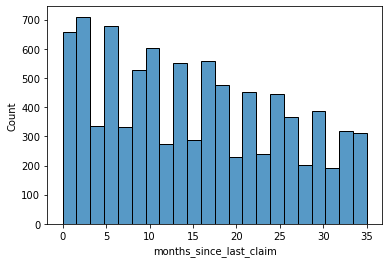

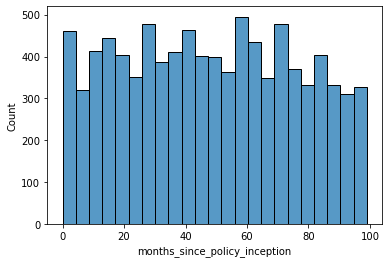

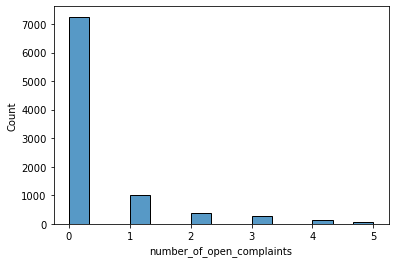

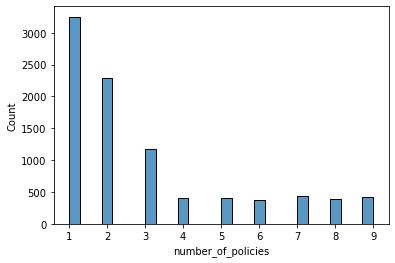

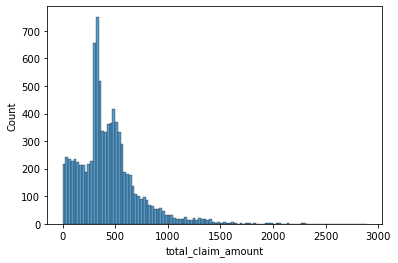

In [114]:
# Plot histograms for the numerical variables
for col in Numerical_variables.columns:
    sns.histplot(Numerical_variables[col])
    plt.show()



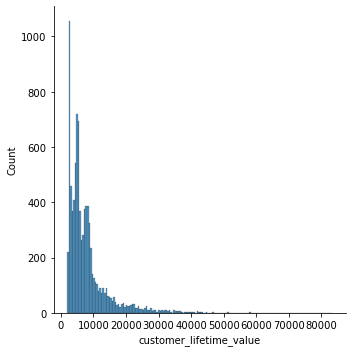

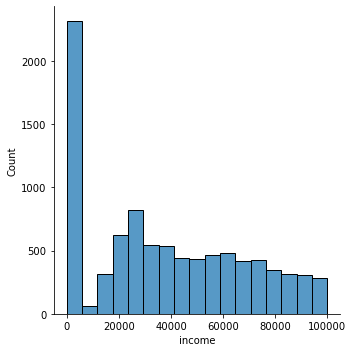

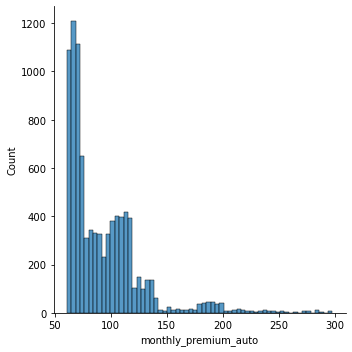

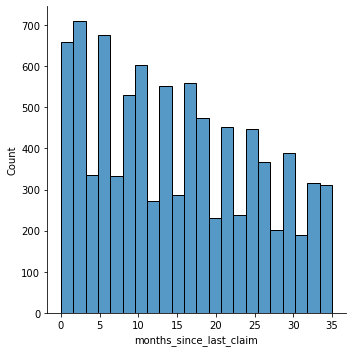

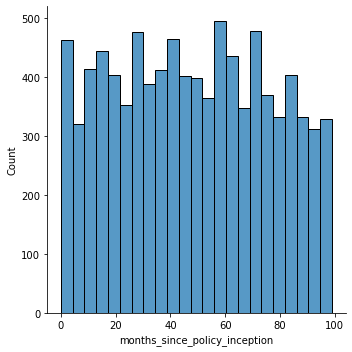

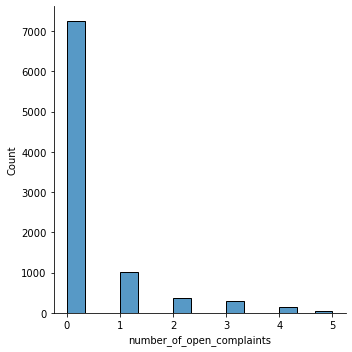

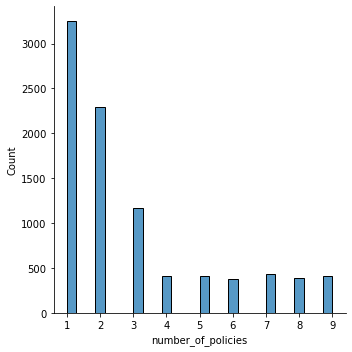

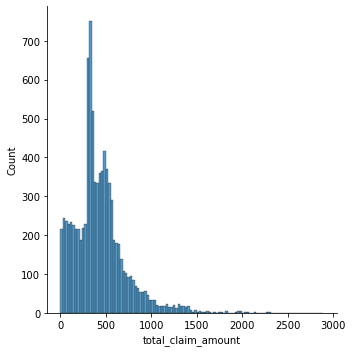

In [115]:
# Plot density plots for the numerical variables
for col in Numerical_variables.columns:
    sns.displot(Numerical_variables[col])
    plt.show()



3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [129]:
min_value = np.min(Numerical_variables[Numerical_variables > 0])
numerical_vars_transformed = np.log(np.maximum(min_value, Numerical_variables.values))
numerical_vars_transformed = pd.DataFrame(numerical_vars_transformed, columns=Numerical_variables.columns)
numerical_vars_transformed

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,5.952753
1,8.850738,9.214034,4.543295,2.564949,3.737670,0.000000,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,6.339428
3,8.941920,9.214034,4.663439,2.890372,4.174387,0.000000,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,5.938064
9131,9.007476,9.214034,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,0.000000,1.098612,6.538429


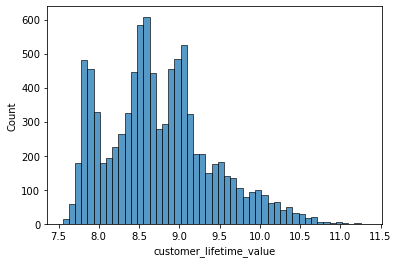

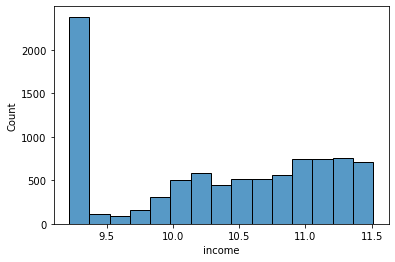

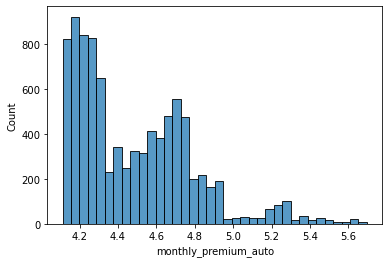

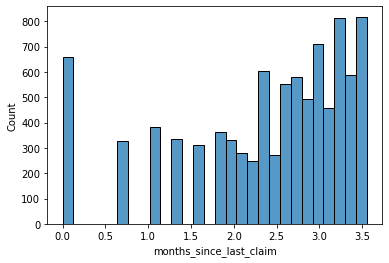

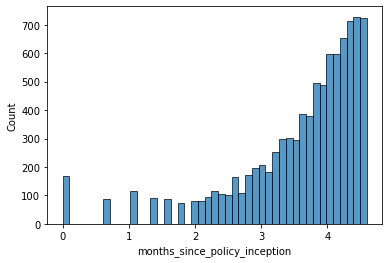

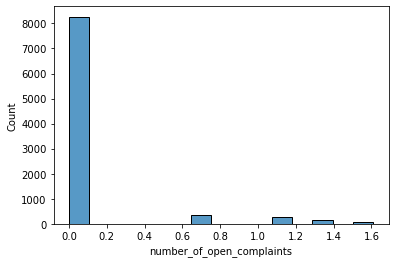

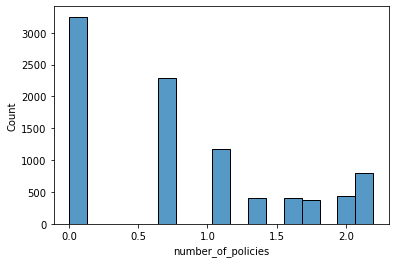

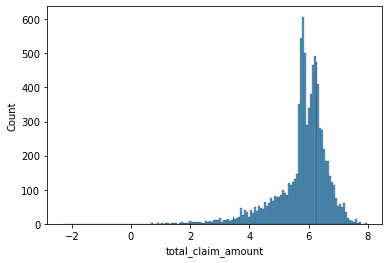

In [131]:
# Plot histograms for the log-transformed variables
for col in numerical_vars_transformed.columns:
    sns.histplot(numerical_vars_transformed[col])
    plt.show()